# Polar plot of AMPS model output

This is an example showing how to plot model output from the AMPS model in polar coordinates. I'm using a module called polarsubplot to do the plotting, but except from that it is all based on pyAMPS

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyamps
from polarsubplot import Polarsubplot

Start by specifiying input parameters:

In [2]:
v = 400 # solar wind speed [km/s]
Bz = -4 # IMF Bz [nT]
By = 4  # IMF By [nT]
f107 = 100 # F10.7 index [sfu]
tilt = 25 # dipole tilt angle [deg]

Set up the AMPS object and plotting axes, and then plot a selection of model output:

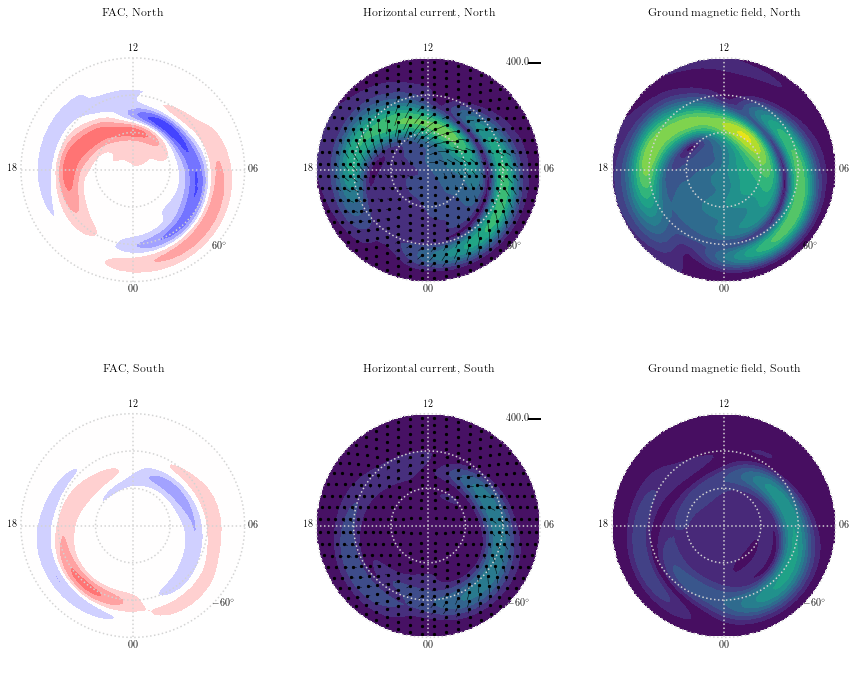

In [3]:
m = pyamps.AMPS(v, By, Bz, tilt, f107, resolution = 50)

fig = plt.figure(figsize = (15, 12))

names = ['FAC, North',
         'Horizontal current, North',
         'Ground magnetic field, North',
         'FAC, South',
         'Horizontal current, South',
         'Ground magnetic field, South']

axes = {}
for i, name in enumerate(names):
    axes[name] = Polarsubplot(fig.add_subplot(2, 3, i + 1), minlat = 60, linestyle = ':', color = 'lightgrey')
    axes[name].ax.set_title(name)
    axes[name].writeMLTlabels(mlat = 59)
    if 'North' in name:
        axes[name].write(60, 3, '60$^\circ$')
    else:
        axes[name].write(60, 3, '$-60^\circ$')
        
# get the grid points:
mlat_s, mlt_s = [np.split(x, 2)[0] for x in m.scalargrid] # grid used for scalarfields
mlat_v, mlt_v = [np.split(x, 2)[0] for x in m.vectorgrid] # grid used for vectorfields

# and do the plotting:
######################

# FACs:
jun, jus = np.split(m.get_upward_current(), 2, axis = 0)
axes['FAC, North'].contourf(mlat_s, mlt_s, jun, cmap = plt.cm.bwr, levels = np.linspace(-.95, .95, 12))
axes['FAC, South'].contourf(mlat_s, mlt_s, jus, cmap = plt.cm.bwr, levels = np.linspace(-.95, .95, 12))

# Horizontal currents (scalar and vectors):
jhn, jhs = np.split(m.get_total_current_magnitude(), 2, axis = 0) # total magnitude
axes['Horizontal current, North'].contourf(mlat_s, mlt_s, jhn, levels = np.linspace(0, 500, 12))
axes['Horizontal current, South'].contourf(mlat_s, mlt_s, jhs, levels = np.linspace(0, 500, 12))

hc = m.get_total_current() # vectors
jhn_e, jhs_e = np.split(hc[0], 2, axis = 0)
jhn_n, jhs_n = np.split(hc[0], 2, axis = 0)
axes['Horizontal current, North'].plotpins(mlat_v, mlt_v, jhn_e, jhn_n, SCALE = 400, markersize = 5, linewidth = .5)
axes['Horizontal current, South'].plotpins(mlat_v, mlt_v, jhs_e, jhs_e, SCALE = 400, markersize = 5, linewidth = .5)

# Horizontal ground magnetic field perturbation magnitude (scalar):
dB = np.sqrt(m.get_ground_Beqd()**2 + m.get_ground_Bnqd()**2)
dBn, dBs = np.split(dB, 2, axis = 0)

axes['Ground magnetic field, North'].contourf(mlat_s, mlt_s, dBn, levels = np.linspace(0, 150, 14))
axes['Ground magnetic field, South'].contourf(mlat_s, mlt_s, dBs, levels = np.linspace(0, 150, 14))


In the above example, the field calculations are done on a pre-defined grid, either the scalargrid or the vectorgrid. This doesn't have to be the case, and the user can specify an arbitrary set of coordinates:

In [4]:
ju = m.get_upward_current(mlat = np.array([70, 75, 80]), mlt = np.array([10, 11, 12]))
print(ju)

[ 0.07501209 -0.59896224  0.52727277]
